#Random Variables and Distributions

##Distribucion uniforme
es una distribucion discreta,en este caso un dado sera nuestro ejemplo, para trabajar vamos a usae random, matplotlib, numpy y pandas.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def dado():
    numero =  [1,2,3,4,5,6]
    return random.choice(numero)

series = np.array([dado() for x in range(10000)])
print(series)

[6 2 2 ... 1 2 2]


para observar que es uniforme graficamos con mathplot.

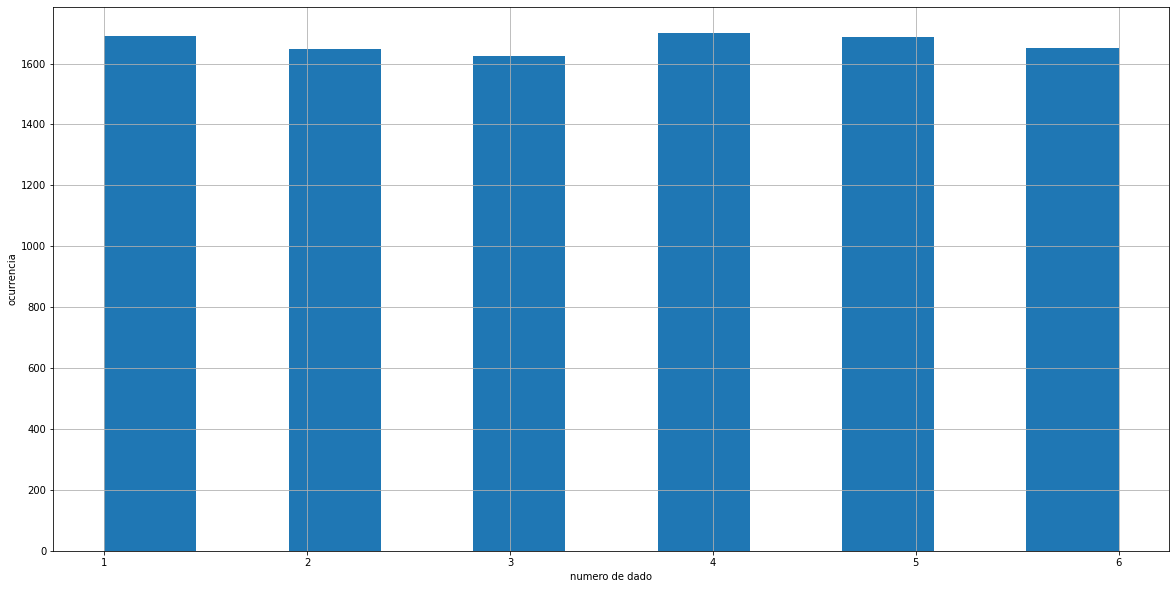

In [2]:
plt.figure(figsize=(20,10))
plt.hist(series,bins = 11, align='mid')
plt.xlabel('numero de dado')
plt.ylabel('ocurrencia')
plt.grid()
plt.show()

podemos conocer la frecuencia de las observaciones que son menores o iguales a 4 asi:

In [3]:
print(len([x for x in series if x <= 4])/float(len(series)))

0.6663


##Distribucion Binomial
cada evento es independiente, si se hace n veces, la probabilidad de sacar exactamente k esta dada por la siguiente funcion:
$$P(X=K)=C_n^{k}p^{k}(1-p)^{n-k}$$
donde:
$$C_n^{k}=\frac{n!}{(n-k)!k!}$$


In [4]:
#se simula con una tasa de p = 0.7 y tiempo n=10
def trial():
    number = [1,2,3,4,5,6,7,8,9,10]
    a = random.choice(number)
    if a<= 7:
        return 1
    else:
        return 0

In [5]:
res = [trial() for x in range(10)]
print(sum(res))

7


In [6]:
#simulamos 10000 veces
def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for x in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/float(len(l))
print(binomial(8))

0.2372


Ahora lo que hacemos es es experimentar 10 veces con un for sencillo, simulamos la probabilidad

In [7]:
prob = []
for i in range(1,11): # 10 veces
  prob.append(binomial(i))
prob_s = pd.Series(prob, index = range(1,11))

print(prob_s)

1     0.0002
2     0.0014
3     0.0069
4     0.0379
5     0.0986
6     0.2034
7     0.2675
8     0.2386
9     0.1198
10    0.0288
dtype: float64


podemos comprobarlo tomando x = 7 y x = 8

In [8]:
#para usar factorial
import math

In [9]:
print((float(math.factorial(10))/(math.factorial(7)*math.factorial(10-7)))*(0.7**7)*(0.3**3))

print((float(math.factorial(10))/(math.factorial(8)*math.factorial(10-8)))*(0.7**8)*(0.3**2))

0.2668279319999998
0.23347444049999988


si graficamos el resultado vemos:


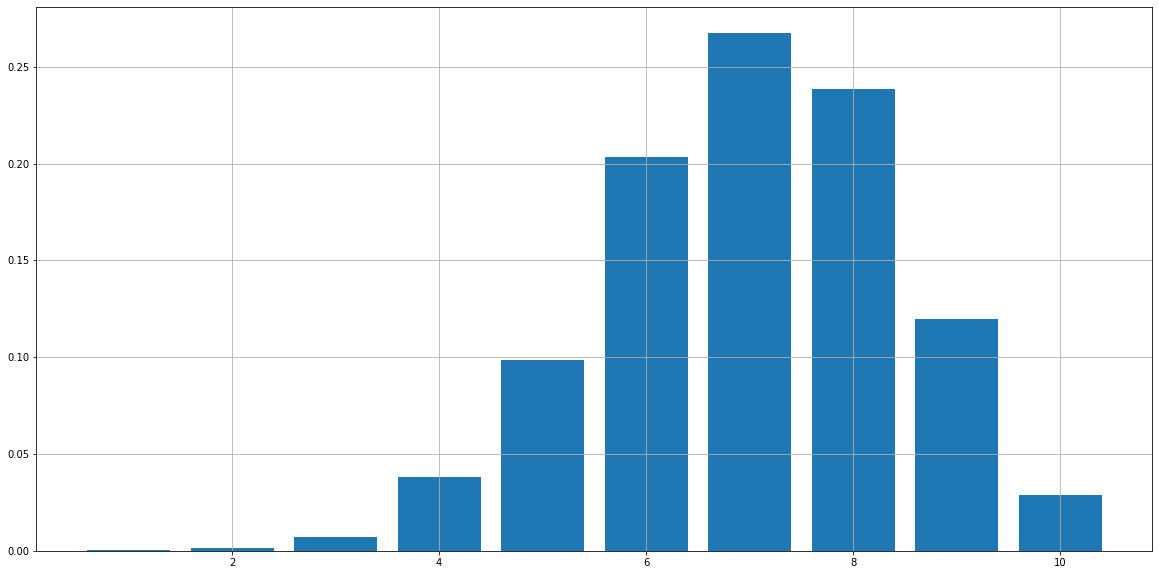

In [10]:
plt.figure(figsize = (20,10))
plt.bar(range(1,11),prob)
plt.grid()
plt.show()

#Distribucion Normal
es una distribucion continua, es usada en ciencias naturales, tambien en investigacion financiera, la funcion de desnsidad de probabilidad es:
$$f(x)=\frac{1}{\sqrt{2\pi \sigma ^{2}}}e^{-\frac{(x-\mu )^{2}}{2\mu^{2}}}$$
si la distribcion normal tiene 0 como media y 1 con desviacion estandar entonces la llamamos distrribucion normal estandar.

In [11]:
pip install Quandl

In [12]:
import quandl
quandl.ApiConfig.api_key = '5aXPhTxNyrgdBN7iN9x4'
spy_table = quandl.get('WIKI/AAPL')
spy = spy_table.loc['2010':'2018',['Open','Close']]
spy['log_return'] = np.log(spy.Close).diff()
spy = spy.dropna()

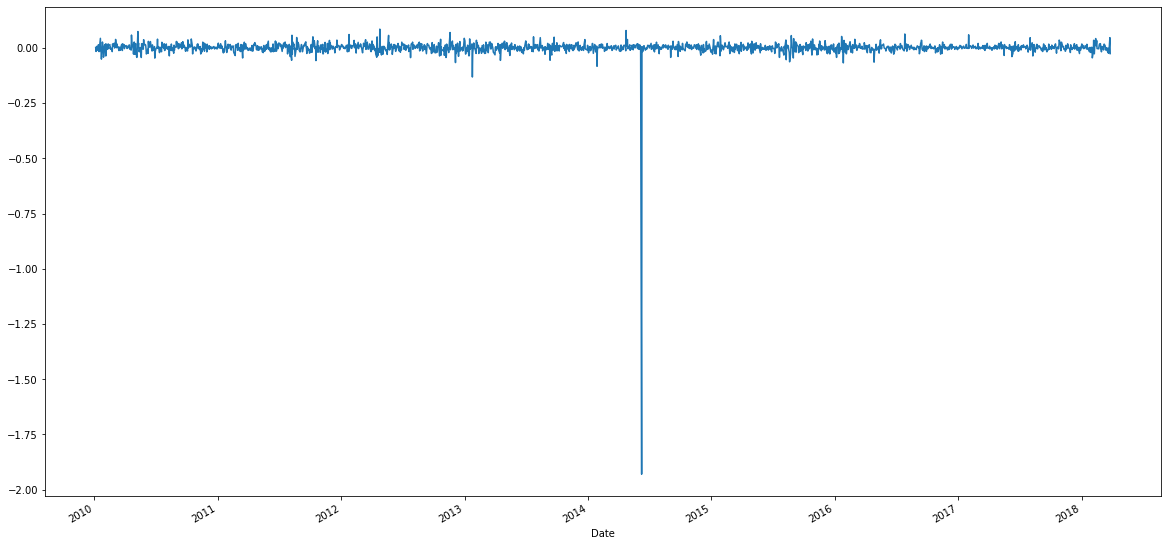

In [13]:
plt.figure(figsize = (20,10))
spy.log_return.plot()
plt.show()


como podemos observar en la grafica hay un dato que esta muy desfazado, esta entre 2014 y 2015, para este ejemplo vamos a recortar la fecha para poder mejorar la visualizacion.

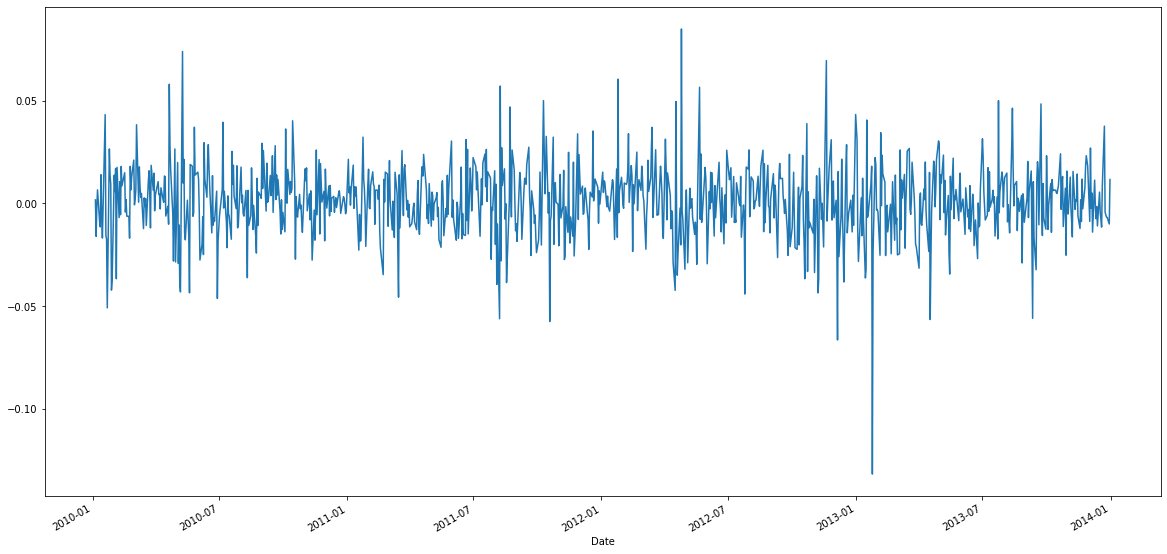

In [14]:
spy = spy_table.loc['2010':'2013',['Open','Close']]
spy['log_return'] = np.log(spy.Close).diff()
spy = spy.dropna()
plt.figure(figsize = (20,10))
spy.log_return.plot()
plt.show()

Para visualizar lo hacemos con plot density del retorno quedando

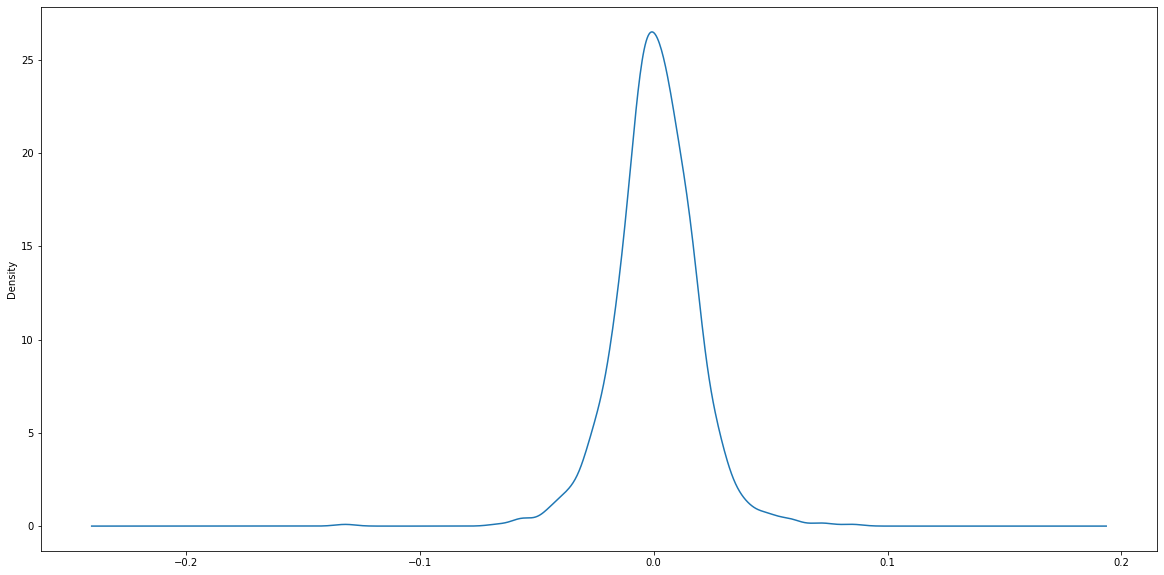

In [15]:
plt.figure(figsize = (20,10))
spy.log_return.plot.density()
plt.show()


por ultimo generamos variables random con diferentes valores de media y desviacion estandar, luego los concatenamos y lo graficamos

<Figure size 1440x720 with 0 Axes>

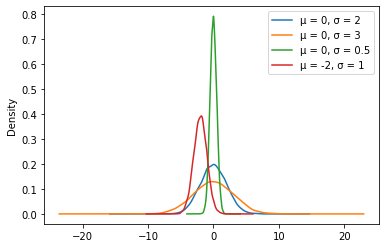

In [16]:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()